<a href="https://colab.research.google.com/github/roshank1605A04/Credit-Card-Fraud-Detection/blob/master/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('drive/My Drive/super/Self Organizing Maps/Credit_Card_Applications.csv')

data.shape

data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [0]:
# splitting the data into dependent and independent variables

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

print(X.shape)
print(y.shape)

(690, 15)
(690,)


In [0]:
data.isnull().any().any()

False

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
CustomerID    690 non-null int64
A1            690 non-null int64
A2            690 non-null float64
A3            690 non-null float64
A4            690 non-null int64
A5            690 non-null int64
A6            690 non-null int64
A7            690 non-null float64
A8            690 non-null int64
A9            690 non-null int64
A10           690 non-null int64
A11           690 non-null int64
A12           690 non-null int64
A13           690 non-null int64
A14           690 non-null int64
Class         690 non-null int64
dtypes: float64(3), int64(13)
memory usage: 86.3 KB


In [0]:
data.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [0]:
# feature scaling

from sklearn.preprocessing import MinMaxScaler

# creating a scaler function
mm = MinMaxScaler(feature_range = (0, 1))

#  feeding the independent variable into the scaler function
X = mm.fit_transform(X)

X.shape

(690, 15)

In [0]:
# training the SOM

from minisom import MiniSom

som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)


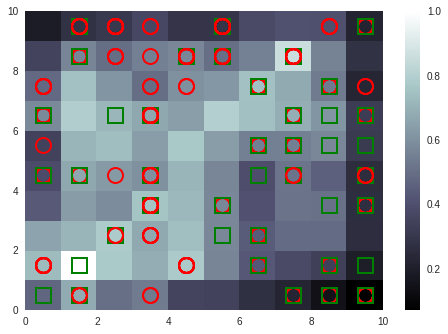

In [0]:
# visualizing the results

from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5, w[1]+0.5,
  markers[y[i]],
  markeredgecolor = colors[y[i]],
  markerfacecolor = 'None',
  markersize = 15,
  markeredgewidth = 2)

show()  

In [0]:
#  finding the frauds

mappings = som.win_map(X)

frauds = np.concatenate((mappings[(2, 4)], mappings[(7, 4)]), axis = 0)
frauds = mm.inverse_transform(frauds)


In [0]:
# creating the matrix of features
customers = data.iloc[:,1:].values

# creating the dependent variable
is_fraud = np.zeros(len(data))

for i in range(len(data)):
  if data.iloc[i,0] in frauds :
    is_fraud[i] = 1


In [0]:
data.columns

Index(['CustomerID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'Class'],
      dtype='object')

In [0]:
# feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

customers = sc.fit_transform(customers)


In [0]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [0]:
model = Sequential()
model.add(Dense(units = 8, init = 'uniform', activation = 'relu', input_dim = 15))
model.add(Dense(units = 1, init = 'uniform', activation = 'sigmoid',))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(customers, is_fraud, batch_size = 10, epochs = 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=8, activation="relu", input_dim=15, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/2
690/690 [==============================] - 1s 877us/step - loss: 0.6604 - acc: 0.9667
Epoch 2/2
690/690 [==============================] - 0s 107us/step - loss: 0.5371 - acc: 0.9783


In [0]:
# predicting the test set results

y_pred = model.predict(customers)
y_pred = np.concatenate((data.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:,1].argsort()]

In [0]:
print(y_pred)

[[1.57997850e+07 2.19296664e-01]
 [1.56214230e+07 2.30880424e-01]
 [1.56548590e+07 2.32349813e-01]
 ...
 [1.56903720e+07 4.45112795e-01]
 [1.56227290e+07 4.50223327e-01]
 [1.57017380e+07 4.51541781e-01]]
